In [ ]:
from __future__ import annotations
from dataclasses import dataclass
from typing import Dict, Tuple
import numpy as np

@dataclass(frozen=True)
class RRUFFRamanRaw:
  meta: Dict[str, str]
  x: np.ndarray  # Raman shift (cm^-1)
  y: np.ndarray  # intensity (arb)

  @staticmethod
  def parse_text(text: str) -> RRUFFRamanRaw:
    meta: Dict[str, str] = {}
    xs = []
    ys = []

    for line in text.splitlines():
      line = line.strip()
      if not line:
        continue

      # Metadata lines
      if line.startswith("##"):
        # example: ##NAMES=Fluornatromicrolite
        if "=" in line:
          k, v = line[2:].split("=", 1)
          meta[k.strip()] = v.strip()
        continue

      # Data lines: "1.036855e+002, 1.242789e+002"
      if "," in line:
        a, b = line.split(",", 1)
        try:
          x = float(a.strip())
          y = float(b.strip())
          xs.append(x)
          ys.append(y)
        except ValueError:
          # ignore non-numeric rows (rare)
          pass

    if len(xs) == 0:
      raise ValueError("No numeric data rows found. Check format / commas.")

    xarr = np.asarray(xs, dtype=float)
    yarr = np.asarray(ys, dtype=float)

    # Ensure increasing x (RRUFF usually is, but be safe)
    order = np.argsort(xarr)
    return RRUFFRamanRaw(meta=meta, x=xarr[order], y=yarr[order])
  
  @staticmethod
  def parse_file(path: str):
    with open(path, 'r') as f:
      return RRUFFRamanRaw.parse_text(text=f.read())


In [4]:
RAW_TEXT = """##NAMES=Fluorcalcioromeite
##RRUFFID=R120140
##IDEAL CHEMISTRY=(Ca,Na)_2_Sb^5+^_2_O_6_F
##LOCALITY=Starlera mine, Starlera Valley, Ferrera, Hinterrhein district, Grishun, Switzerland
##OWNER=RRUFF
##SOURCE=Marcelo Andrade
##DESCRIPTION=Brownish-yellow octahedra, associated with hematite, calcite and quartz. Type specimen (Atencio et al (2013))
##STATUS=The identification of this mineral is confirmed by single-crystal X-ray diffraction and chemical analysis
##URL=https://www.rruff.net/odr/rruff_sample/R120140
##MEASURED CHEMISTRY=(Ca_1.16_Na_0.56_Fe_0.03_Mn_0.03_)(Sb_1.98_Al_0.01_W_0.01_)_2_O_6_[F_0.62_(OH)_0.35_]
##DIFFRACTION SAMPLE DESCRIPTION=Single crystal, powder profile is calculated
##CELL PARAMETERS=a: 10.2987 b: 10.2987 c: 10.2987 alpha: 90 beta: 90 gamma: 90 volume: 1092.3 crystal system: cubic
##FILETYPE=Raman Processed
##RAMAN WAVELENGTH=780

109.1240, 438.1704
111.0525, 434.3568
112.9810, 432.0942
114.9094, 429.9347
116.8379, 427.6027
118.7664, 425.8932
120.6948, 424.7523
122.6233, 423.9799
124.5518, 423.3029
126.4802, 422.9214
128.4087, 423.0976
130.3372, 423.7658
132.2656, 424.4445
134.1941, 425.0382
136.1226, 425.5862
138.0510, 426.6480
139.9795, 427.2165
141.9080, 426.0516
143.8364, 423.2505
145.7649, 421.1772
147.6934, 420.1510
149.6218, 419.6493
151.5503, 420.4259
153.4788, 420.9933
155.4072, 419.9986
157.3357, 417.6448
159.2642, 415.6839
161.1926, 414.0071
163.1211, 412.9940
165.0496, 413.3871
166.9780, 413.7982
168.9065, 413.4751
170.8350, 412.5063
172.7634, 411.0353
174.6919, 407.7864
176.6204, 406.4949
178.5488, 408.0482
180.4773, 410.4649
182.4058, 413.1273
184.3342, 415.8151
186.2627, 418.2312
188.1912, 420.5118
190.1196, 421.8207
192.0481, 421.7450
193.9766, 421.4937
195.9050, 421.8438
197.8335, 422.0391
199.7620, 421.1351
201.6904, 419.0951
203.6189, 417.6468
205.5474, 416.8112
207.4758, 416.3893
209.4043, 416.0566
211.3328, 416.5028
213.2612, 418.2872
215.1897, 421.1939
217.1182, 424.4913
219.0466, 428.1966
220.9751, 432.2948
222.9036, 438.6861
224.8320, 441.9987
226.7605, 439.1347
228.6890, 432.7465
230.6174, 425.5992
232.5459, 417.7602
234.4744, 411.6622
236.4028, 407.2352
238.3313, 405.1029
240.2598, 406.8600
242.1882, 409.6728
244.1167, 411.1384
246.0452, 412.3493
247.9736, 416.8534
249.9021, 424.6355
251.8306, 433.6044
253.7590, 443.3244
255.6875, 454.3159
257.6160, 467.5443
259.5444, 481.4577
261.4729, 493.7975
263.4014, 505.1120
265.3298, 518.1562
267.2583, 533.5795
269.1868, 549.0258
271.1152, 563.6571
273.0437, 578.5898
274.9722, 593.8845
276.9006, 610.0566
278.8291, 627.9781
280.7576, 647.5317
282.6860, 667.8658
284.6145, 688.6231
286.5430, 710.7775
288.4714, 738.6964
290.3999, 763.8438
292.3284, 781.4183
294.2568, 791.2202
296.1853, 793.1597
298.1138, 786.9442
300.0422, 775.7105
301.9707, 758.7605
303.8992, 738.0681
305.8276, 712.1057
307.7561, 684.1046
309.6846, 655.5682
311.6130, 627.2913
313.5415, 600.9727
315.4700, 576.3400
317.3984, 555.3006
319.3269, 538.5006
321.2554, 524.1343
323.1838, 512.0992
325.1123, 502.1139
327.0408, 494.1201
328.9692, 487.8597
330.8977, 482.7638
332.8262, 479.3193
334.7546, 475.7859
336.6831, 471.5498
338.6116, 468.0824
340.5400, 466.1264
342.4685, 464.8125
344.3970, 463.3003
346.3254, 462.7520
348.2539, 462.5578
350.1824, 462.4355
352.1108, 463.3792
354.0393, 463.9789
355.9678, 465.0487
357.8962, 466.4714
359.8247, 468.8862
361.7532, 473.3253
363.6816, 478.8197
365.6101, 483.5034
367.5386, 487.7704
369.4670, 487.8951
371.3955, 482.3485
373.3240, 477.0744
375.2524, 473.4679
377.1809, 470.9088
379.1094, 469.3102
381.0378, 468.2652
382.9663, 466.9741
384.8948, 465.4449
386.8232, 464.9793
388.7517, 465.5826
390.6802, 466.9692
392.6086, 468.8823
394.5371, 471.9765
396.4656, 476.2151
398.3940, 481.9126
400.3225, 489.7798
402.2510, 499.4482
404.1794, 509.4818
406.1079, 519.9244
408.0364, 529.5784
409.9648, 538.4380
411.8933, 546.0828
413.8218, 550.9941
415.7502, 556.2041
417.6787, 562.4682
419.6072, 570.6398
421.5356, 582.8400
423.4641, 598.5664
425.3926, 614.7087
427.3210, 630.7238
429.2495, 649.3875
431.1780, 672.8300
433.1064, 696.9704
435.0349, 719.2698
436.9634, 742.9894
438.8918, 769.7215
440.8203, 800.5200
442.7488, 836.9533
444.6772, 879.0045
446.6057, 926.8284
448.5342, 980.7153
450.4626, 1039.748
452.3911, 1106.399
454.3196, 1174.106
456.2480, 1243.604
458.1765, 1310.309
460.1050, 1369.105
462.0334, 1421.889
463.9619, 1469.291
465.8904, 1511.145
467.8188, 1562.144
469.7473, 1613.103
471.6758, 1695.117
473.6042, 1802.324
475.5327, 1951.638
477.4612, 2158.033
479.3896, 2403.241
481.3181, 2687.783
483.2466, 2991.411
485.1750, 3274.021
487.1035, 3534.638
489.0320, 3774.591
490.9604, 3948.701
492.8889, 4176.774
494.8174, 4451.451
496.7458, 4794.458
498.6743, 5202.859
500.6028, 5695.205
502.5313, 6314.955
504.4597, 7008.227
506.3882, 7708.568
508.3167, 8414.563
510.2451, 9028.929
512.1736, 9659.220
514.1021, 9903.209
516.0305, 9720.487
517.9590, 9214.918
519.8875, 8263.170
521.8159, 7204.163
523.7444, 6156.371
525.6729, 5178.776
527.6013, 4337.730
529.5298, 3626.511
531.4583, 3018.345
533.3867, 2520.785
535.3152, 2106.057
537.2437, 1779.928
539.1721, 1513.765
541.1006, 1311.582
543.0291, 1149.375
544.9575, 1028.370
546.8860, 932.0359
548.8145, 855.4960
550.7429, 795.0814
552.6714, 747.4843
554.5999, 711.5518
556.5283, 681.2918
558.4568, 656.5294
560.3853, 636.0765
562.3137, 620.4547
564.2422, 606.3632
566.1707, 592.9286
568.0991, 581.0544
570.0276, 571.6271
571.9561, 563.0451
573.8845, 553.7009
575.8130, 544.9041
577.7415, 539.2954
579.6699, 535.7967
581.5984, 530.1195
583.5269, 522.4591
585.4553, 515.8795
587.3838, 510.7536
589.3123, 506.2413
591.2407, 502.2605
593.1692, 498.7781
595.0977, 496.1910
597.0261, 493.6204
598.9546, 490.3182
600.8831, 487.0642
602.8115, 485.1252
604.7400, 483.6505
606.6685, 480.8685
608.5969, 477.0013
610.5254, 473.3253
612.4539, 470.0055
614.3823, 465.8496
616.3108, 460.2313
618.2393, 454.7401
620.1677, 449.6350
622.0962, 444.6295
624.0247, 439.3079
625.9531, 434.4783
627.8816, 430.7352
629.8101, 427.7232
631.7385, 425.1193
633.6670, 422.8976
635.5955, 421.0479
637.5239, 419.5576
639.4524, 418.3464
641.3809, 417.6107
643.3093, 416.4208
645.2378, 413.8822
647.1663, 412.4150
649.0947, 412.8141
651.0232, 413.2869
652.9517, 413.6128
654.8801, 413.4522
656.8086, 412.2088
658.7371, 410.7678
660.6655, 410.1278
662.5940, 409.6612
664.5225, 408.0120
666.4509, 407.2013
668.3794, 406.0808
670.3079, 404.5403
672.2363, 404.0185
674.1648, 402.3342
676.0933, 401.7110
678.0217, 402.7703
679.9502, 403.3573
681.8787, 402.5437
683.8071, 402.0763
685.7356, 403.0306
687.6641, 404.0470
689.5925, 404.3990
691.5210, 404.4306
693.4495, 404.3186
695.3779, 404.1894
697.3064, 404.1458
699.2349, 404.2797
701.1633, 405.0443
703.0918, 405.8084
705.0203, 407.5949
706.9487, 408.5003
708.8772, 409.9537
710.8057, 412.2226
712.7341, 414.0464
714.6626, 415.0766
716.5911, 415.8688
718.5195, 416.7435
720.4480, 417.1729
722.3765, 416.4084
724.3049, 415.7917
726.2334, 416.3636
728.1619, 417.3290
730.0903, 418.0531
732.0188, 418.4902
733.9473, 418.4463
735.8757, 418.0771
737.8042, 417.5319
739.7327, 417.0362
741.6611, 418.1060
743.5896, 420.7876
745.5181, 422.6674
747.4465, 423.3075
749.3750, 424.1534
751.3035, 425.0897
753.2319, 426.9514
755.1604, 430.2709
757.0889, 433.8497
759.0173, 437.4972
760.9458, 441.1997
762.8743, 443.7818
764.8027, 447.8190
766.7312, 455.8473
768.6597, 465.5176
770.5881, 474.3891
772.5166, 483.5006
774.4451, 494.6537
776.3735, 506.8825
778.3020, 518.3862
780.2305, 529.0306
782.1589, 538.5350
784.0874, 546.9452
786.0159, 552.0906
787.9443, 552.3631
789.8728, 555.4200
791.8013, 563.0707
793.7297, 570.1821
795.6582, 576.7092
797.5867, 582.8779
799.5151, 588.4617
801.4436, 594.1550
803.3721, 598.9850
805.3005, 605.9256
807.2290, 615.8033
809.1575, 628.7234
811.0859, 645.9309
813.0144, 664.7123
814.9429, 683.9511
816.8713, 702.9364
818.7998, 723.5720
820.7283, 741.5388
822.6567, 751.9225
824.5852, 754.2548
826.5137, 747.0251
828.4421, 730.8469
830.3706, 706.6025
832.2991, 675.0192
834.2275, 643.4928
836.1560, 611.9869
838.0845, 582.1838
840.0129, 554.0026
841.9414, 530.1061
843.8699, 510.9134
845.7983, 493.5982
847.7268, 477.8490
849.6553, 463.7324
851.5837, 451.3416
853.5122, 440.1952
855.4407, 430.2649
857.3691, 421.3185
859.2976, 413.1662
861.2261, 406.1986
863.1545, 400.3611
865.0830, 395.9606
867.0115, 394.1362
868.9399, 392.4450
870.8684, 389.1691
872.7969, 385.9128
874.7253, 383.8426
876.6538, 382.3846
878.5823, 380.8398
880.5107, 379.7605
882.4392, 380.2422
884.3677, 379.7892
886.2961, 381.2631
888.2246, 380.8621
890.1531, 381.6853
892.0815, 383.0191
894.0100, 382.9586
895.9385, 383.9941
897.8669, 383.0135
899.7954, 385.0028
901.7239, 385.9342
903.6523, 385.8293
905.5808, 385.3451
907.5093, 384.5208
909.4377, 384.8438
911.3662, 386.5477
913.2947, 387.7687
915.2231, 388.4842
917.1516, 388.5425
919.0801, 387.8647
921.0085, 386.7415
922.9370, 384.6816
924.8655, 383.1775
926.7939, 382.8452
928.7224, 381.8204
930.6509, 379.5809
932.5793, 377.5057
934.5078, 375.5665
936.4363, 374.2823
938.3647, 374.1808
940.2932, 373.7112
942.2217, 372.0219
944.1501, 371.0085
946.0786, 371.7919
948.0071, 372.1214
949.9355, 370.9230
951.8640, 369.6010
953.7925, 368.3496
955.7209, 367.9343
957.6494, 369.3663
959.5779, 370.6016
961.5063, 370.3718
963.4348, 370.0567
965.3633, 370.2499
967.2917, 370.7960
969.2202, 371.9593
971.1487, 372.9638
973.0771, 372.7719
975.0056, 372.9245
976.9341, 374.8443
978.8625, 377.0584
980.7910, 378.2912
982.7195, 379.4973
984.6479, 381.7627
986.5764, 384.0490
988.5049, 385.5237
990.4333, 386.4336
992.3618, 386.5283
994.2903, 386.7151
996.2188, 388.2909
998.1472, 390.1331
1000.076, 391.0740
1002.004, 391.5159
1003.933, 391.6519
1005.861, 391.8400
1007.790, 392.8459
1009.718, 393.8360
1011.646, 393.4203
1013.575, 392.6323
1015.503, 392.7642
1017.432, 393.3835
1019.360, 394.0226
1021.289, 394.7179
1023.217, 395.7368
1025.146, 396.6768
1027.074, 397.1586
1029.003, 397.1047
1030.931, 396.0010
1032.860, 394.6593
1034.788, 393.9641
1036.717, 393.8546
1038.645, 394.3549
1040.573, 395.2646
1042.502, 396.3621
1044.430, 397.6441
1046.359, 399.4936
1048.287, 401.1719
1050.216, 401.3499
1052.144, 402.9509
1054.073, 402.7177
1056.001, 404.4547
1057.930, 404.6342
1059.858, 404.3460
1061.787, 404.7765
1063.715, 405.5154
1065.644, 406.1747
1067.572, 406.7437
1069.500, 406.9759
1071.429, 407.3192
1073.357, 408.3375
1075.286, 409.6054
1077.214, 411.3983
1079.143, 412.5043
1081.071, 411.1481
1083.000, 409.4393
1084.928, 408.7437
1086.857, 409.0592
1088.785, 411.4212
1090.714, 413.4625
1092.642, 413.3000
1094.571, 412.3022
1096.499, 410.8172
1098.427, 409.5536
1100.356, 408.7444
1102.284, 408.5511
1104.213, 409.6960
1106.141, 410.5563
1108.070, 409.9074
1109.998, 409.4096
1111.927, 410.0648
1113.855, 410.5976
1115.784, 410.2187
1117.712, 410.1874
1119.641, 411.7482
1121.569, 412.1944
1123.498, 409.3718
1125.426, 408.1379
1127.354, 410.7836
1129.283, 412.5817
1131.211, 411.2640
1133.140, 412.3557
1135.068, 418.3394
1136.997, 422.4936
1138.925, 423.8705
1140.854, 422.8331
1142.782, 418.1441
1144.711, 416.7957
1146.639, 420.2411
1148.568, 422.6964
1150.496, 423.5748
1152.425, 424.7010
1154.353, 426.1642
1156.281, 428.3391
1158.210, 431.2263
1160.138, 433.9598
1162.067, 436.5091
1163.995, 439.0738
1165.924, 441.6472
1167.852, 444.2606
1169.781, 446.8730
1171.709, 449.3964
1173.638, 451.7630
1175.566, 453.5816
1177.495, 455.1795
1179.423, 456.8607
1181.352, 459.1204
1183.280, 463.3741
1185.208, 468.0391
1187.137, 470.5274
1189.065, 473.0702
1190.994, 478.6303
1192.922, 484.0773
1194.851, 487.1094
1196.779, 489.2822
1198.708, 491.5262
1200.636, 493.3037
1202.565, 494.8606
1204.493, 494.6855
1206.422, 491.0643
1208.350, 488.6926
1210.279, 489.5083
1212.207, 489.8481
1214.135, 488.5959
1216.064, 487.6885
1217.992, 487.3633
1219.921, 488.5772
1221.849, 491.6296
1223.778, 493.5913
1225.706, 494.2701
1227.635, 495.6087
1229.563, 497.6277
1231.492, 499.3664
1233.420, 500.8552
1235.349, 502.6518
1237.277, 504.3943
1239.206, 504.9273
1241.134, 504.7224
1243.063, 504.0659
1244.991, 503.9467
1246.919, 506.6612
1248.848, 509.5648
1250.776, 509.0505
1252.705, 508.8322
1254.633, 512.2089
1256.562, 515.9734
1258.490, 518.8542
1260.419, 520.9897
1262.347, 521.0196
1264.276, 522.9005
1266.204, 528.5228
1268.133, 533.6408
1270.061, 537.2556
1271.990, 542.5266
1273.918, 549.9113
1275.846, 557.1561
1277.775, 564.1703
1279.703, 570.2385
1281.632, 575.7472
1283.560, 583.2010
1285.489, 592.3351
1287.417, 602.4703
1289.346, 613.4119
1291.274, 625.9786
1293.203, 637.8212
1295.131, 645.8315
1297.060, 652.9456
1298.988, 661.6209
1300.917, 669.7188
1302.845, 677.0070
1304.773, 681.3442
1306.702, 681.0031
1308.630, 680.4301
1310.559, 680.9550
1312.487, 680.2836
1314.416, 677.9380
1316.344, 675.4893
1318.273, 672.9876
1320.201, 670.8239
1322.130, 668.9005
1324.058, 666.3339
1325.987, 663.6754
1327.915, 662.9695
1329.844, 663.0013
1331.772, 661.7568
1333.700, 660.2617
1335.629, 660.0811
1337.557, 659.2863
1339.486, 655.9344
1341.414, 653.0233
1343.343, 651.5263
1345.271, 650.6910
1347.200, 650.5380
1349.128, 649.8175
1351.057, 648.2871
1352.985, 648.8111
1354.914, 647.7970
1356.842, 647.7347
1358.771, 647.7557
1360.699, 648.0931
1362.627, 650.0125
1364.556, 651.2097
1366.484, 651.5433
1368.413, 649.4811
1370.341, 648.4609
1372.270, 652.2010
1374.198, 655.7000
1376.127, 656.4949
1378.055, 657.2661
1379.984, 658.2889
1381.912, 659.9081
1383.841, 662.1429
1385.769, 665.1155
1387.698, 668.7185
1389.626, 671.6757
1391.554, 674.1512
1393.483, 676.6378
1395.411, 679.1487
1397.340, 681.8597
1399.268, 684.3614
1401.197, 685.4796
1403.125, 687.6443
1405.054, 692.4796
1406.982, 697.8972
1408.911, 703.9445
1410.839, 708.8207
1412.768, 712.0322
1414.696, 715.0372
1416.625, 717.8407
1418.553, 721.5424
1420.481, 725.7151
1422.410, 729.1094
1424.338, 731.8729
1426.267, 734.4794
1428.195, 736.2553
1430.124, 735.5081
1432.052, 736.4833
1433.981, 741.5416
1435.909, 746.7889
1437.838, 751.6484
1439.766, 753.7449
1441.695, 756.2772
1443.623, 754.2274
1445.552, 757.3920
1447.480, 756.8350
1449.408, 754.9891
1451.337, 757.1522
1453.265, 759.9673
1455.194, 759.1909
1457.122, 759.2272
1459.051, 761.9492
1460.979, 766.7646
1462.908, 774.2003
1464.836, 780.1833
1466.765, 784.3552
1468.693, 788.9313
1470.622, 793.7061
1472.550, 796.9123
1474.479, 799.2738
1476.407, 802.0244
1478.335, 804.5228
1480.264, 805.9633
1482.192, 807.2479
1484.121, 809.9656
1486.049, 809.9074
1487.978, 808.7920
1489.906, 807.5397
1491.835, 803.3529
1493.763, 800.5968
1495.692, 795.3852
1497.620, 788.4841
1499.549, 781.5443
1501.477, 777.0493
1503.406, 772.4910
1505.334, 765.2250
1507.262, 759.5126
1509.191, 757.1790
1511.119, 755.5230
1513.048, 754.4339
1514.976, 753.8152
1516.905, 753.6658
1518.833, 753.8260
1520.762, 754.3842
1522.690, 756.0547
1524.619, 757.2145
1526.547, 756.2361
1528.476, 755.7086
1530.404, 756.4703
1532.333, 758.0849
1534.261, 760.5471
1536.189, 763.9859
1538.118, 768.1485
1540.046, 771.6721
1541.975, 774.7742
1543.903, 778.1600
1545.832, 780.6306
1547.760, 779.7371
1549.689, 781.7423
1551.617, 788.9982
1553.546, 795.5814
1555.474, 800.6611
1557.403, 805.0245
1559.331, 808.6370
1561.260, 811.0156
1563.188, 812.7446
1565.116, 814.1668
1567.045, 815.9572
1568.973, 818.5699
1570.902, 821.7744
1572.830, 825.9127
1574.759, 826.9326
1576.687, 824.8901
1578.616, 822.3295
1580.544, 819.9156
1582.473, 819.5933
1584.401, 818.7996
1586.330, 813.9258
1588.258, 810.4059
1590.187, 812.5837
1592.115, 810.5626
1594.043, 803.4531
1595.972, 798.8079
1597.900, 795.9607
1599.829, 792.5509
1601.757, 788.3600
1603.686, 782.5625
1605.614, 776.9997
1607.543, 773.1614
1609.471, 768.5626
1611.400, 763.9410
1613.328, 758.0750
1615.257, 755.3929
1617.185, 751.2723
1619.114, 747.6788
1621.042, 748.1809
1622.970, 748.4866
1624.899, 745.7650
1626.827, 744.2143
1628.756, 745.0938
1630.684, 745.1453
1632.613, 744.4131
1634.541, 743.8035
1636.470, 743.1410
1638.398, 741.9778
1640.327, 741.0197
1642.255, 740.9736
1644.184, 739.5266
1646.112, 739.4344
1648.041, 735.7546
1649.969, 737.9972
1651.897, 736.5558
1653.826, 734.0016
1655.754, 734.2869
1657.683, 734.0862
1659.611, 731.8745
1661.540, 729.1790
1663.468, 726.2811
1665.397, 724.1732
1667.325, 722.7758
1669.254, 722.1900
1671.182, 720.9962
1673.111, 716.9291
1675.039, 712.9557
1676.968, 710.0671
1678.896, 707.1661
1680.824, 704.2092
1682.753, 703.6510
1684.681, 703.2068
1686.610, 697.3392
1688.538, 691.1184
1690.467, 689.2487
1692.395, 686.3400
1694.324, 680.8791
1696.252, 676.1946
1698.181, 672.3922
1700.109, 669.3484
1702.038, 667.2723
1703.966, 667.2686
1705.895, 666.5953
1707.823, 663.2952
1709.751, 660.9294
1711.680, 659.9362
1713.608, 656.5494
1715.537, 652.3444
1717.465, 650.7389
1719.394, 650.5397
1721.322, 651.3596
1723.251, 652.4769
1725.179, 654.1355
1727.108, 651.8733
1729.036, 647.0208
1730.965, 645.5170
1732.893, 645.2943
1734.822, 644.3633
1736.750, 643.9482
1738.678, 644.6053
1740.607, 644.6672
1742.535, 643.9826
1744.464, 642.2319
1746.392, 640.2021
1748.321, 639.0199
1750.249, 637.8762
1752.178, 636.2506
1754.106, 635.8767
1756.035, 634.6991
1757.963, 635.4218
1759.892, 633.2754
1761.820, 631.4764
1763.749, 631.1364
1765.677, 634.1517
1767.605, 634.1287
1769.534, 630.5804
1771.462, 626.6770
1773.391, 623.9418
1775.319, 626.1497
1777.248, 628.4088
1779.176, 627.2764
1781.105, 626.1833
1783.033, 625.5038
1784.962, 625.0032
1786.890, 625.3573
1788.819, 628.8163
1790.747, 631.6969
1792.676, 631.1039
1794.604, 630.4343
1796.532, 630.0204
1798.461, 631.2411
1800.389, 632.3192
1802.318, 628.6990
1804.246, 625.2830
1806.175, 625.4720
1808.103, 624.6551
1810.032, 622.3138
1811.960, 619.9523
1813.889, 617.7811
1815.817, 616.1902
1817.746, 614.8655
1819.674, 613.6415
1821.603, 612.7048
1823.531, 611.9572
1825.459, 610.8499
1827.388, 608.5961
1829.316, 602.8719
1831.245, 597.9379
1833.173, 595.2784
1835.102, 593.2436
1837.030, 591.6105
1838.959, 589.9579
1840.887, 588.4066
1842.816, 585.9720
1844.744, 585.4159
1846.673, 581.2858
1848.601, 578.6957
1850.530, 577.0266
1852.458, 573.2906
1854.386, 570.0663
1856.315, 569.6662
1858.243, 569.8281
1860.172, 570.1868
1862.100, 568.5333
1864.029, 566.2095
1865.957, 565.7308
1867.886, 565.1417
1869.814, 563.0727
1871.743, 562.7693
1873.671, 563.8522
1875.600, 563.4189
1877.528, 561.9681
1879.457, 559.2137
1881.385, 557.3793
1883.313, 557.0648
1885.242, 557.2157
1887.170, 557.6965
1889.099, 558.0798
1891.027, 558.8781
1892.956, 561.4168
1894.884, 560.8810
1896.813, 562.1696
1898.741, 559.6597
1900.670, 562.3520
1902.598, 559.7001
1904.527, 557.4550
1906.455, 557.5605
1908.384, 557.0306
1910.312, 556.2160
1912.240, 555.6511
1914.169, 556.4156
1916.097, 556.2851
1918.026, 555.9578
1919.954, 557.0409
1921.883, 555.6671
1923.811, 555.3642
1925.740, 556.1135
1927.668, 556.3546
1929.597, 555.7691
1931.525, 555.3790
1933.454, 555.3671
1935.382, 555.2120
1937.311, 554.9467
1939.239, 554.9326
1941.167, 554.6686
1943.096, 554.7864
1945.024, 555.0400
1946.953, 555.0441
1948.881, 554.5704
1950.810, 553.1979
1952.738, 551.2707
1954.667, 552.0141
1956.595, 552.8958
1958.524, 550.3584
1960.452, 549.2946
1962.381, 550.5203
1964.309, 549.7098
1966.238, 548.1913
1968.166, 548.3486
1970.094, 548.3790
1972.023, 547.2774
1973.951, 548.2812
1975.880, 550.2902
1977.808, 550.4226
1979.737, 550.0791
1981.665, 549.9337
1983.594, 549.5449
1985.522, 549.0377
1987.451, 548.7861
1989.379, 549.4123
1991.308, 551.7866
1993.236, 553.1002
1995.165, 553.1621
1997.093, 552.1959
1999.021, 552.2307
2000.950, 555.3615
2002.878, 557.3810
2004.807, 557.5579
2006.735, 557.2004
2008.664, 557.0742
2010.592, 558.2457
2012.521, 558.9344
2014.449, 558.8589
2016.378, 560.2914
2018.306, 562.0920
2020.235, 562.3717
2022.163, 563.2723
2024.092, 565.1472
2026.020, 565.4337
2027.948, 564.8582
2029.877, 564.5079
2031.805, 563.9863
2033.734, 563.1953
2035.662, 559.3973
2037.591, 556.4924
2039.519, 564.1833
2041.448, 566.6351
2043.376, 559.8004
2045.305, 555.8281
2047.233, 554.2203
2049.162, 553.6360
2051.090, 553.3140
2053.019, 552.8546
2054.947, 555.1511
2056.875, 558.3356
2058.804, 559.6953
2060.732, 560.0951
2062.661, 559.6994
2064.589, 559.5054
2066.518, 558.1337
2068.446, 555.3229
2070.375, 552.6946
2072.303, 547.7831
2074.232, 544.4968
2076.160, 539.6339
2078.089, 533.7818
2080.017, 530.7761
2081.946, 527.7396
2083.874, 528.3969
2085.802, 523.4537
2087.731, 521.1441
2089.659, 518.1720
2091.588, 513.9534
2093.516, 512.6759
2095.445, 512.1599
2097.373, 510.4511
2099.302, 508.0900
2101.230, 505.3742
2103.159, 503.8935
2105.087, 502.4179
2107.016, 499.8811
2108.944, 497.3593
2110.873, 495.0147
2112.801, 492.9932
2114.729, 491.1019
2116.658, 489.2456
2118.586, 487.7648
2120.515, 486.2564
2122.443, 483.1810
2124.372, 480.4381
2126.300, 478.6435
2128.229, 479.6259
2130.157, 481.3460
2132.086, 479.8683
2134.014, 478.2651
2135.943, 477.3784
2137.871, 476.6978
2139.800, 476.1361
2141.728, 475.5705
2143.656, 475.2593
2145.585, 475.1826
2147.513, 474.6365
2149.442, 473.7678
2151.370, 472.4206
2153.299, 471.6816
2155.227, 471.5719
2157.156, 472.5334
2159.084, 472.8002
2161.013, 471.4684
2162.941, 470.0281
2164.870, 468.8578
2166.798, 468.4919
2168.727, 468.6205
2170.655, 469.1681
2172.583, 470.1371
2174.512, 470.8364
2176.440, 470.8432
2178.369, 468.2825
2180.297, 464.5149
2182.226, 468.8746
2184.154, 473.1660
2186.083, 473.5978
2188.011, 469.0023
2189.940, 462.9601
2191.868, 462.7601
2193.797, 463.5282
2195.725, 463.9481
2197.654, 463.6185
2199.582, 462.3363
2201.510, 462.4240
2203.439, 461.0654
2205.367, 460.8559
2207.296, 458.9071
2209.224, 456.6169
2211.153, 455.8708
2213.081, 457.3986
2215.010, 459.0582
2216.938, 457.5625
2218.867, 454.9914
2220.795, 451.9846
2222.724, 451.5986
2224.652, 451.2159
2226.581, 448.5468
2228.509, 447.0663
2230.438, 446.5565
2232.366, 446.5075
2234.294, 445.5204
2236.223, 444.9917
2238.151, 444.2868
2240.080, 443.4738
2242.008, 442.7274
2243.937, 442.0731
2245.865, 441.4452
2247.794, 440.1060
2249.722, 438.3172
2251.651, 436.2112
2253.579, 436.2592
2255.508, 436.6004
2257.436, 435.2148
2259.365, 434.3416
2261.293, 433.7162
2263.221, 431.0044
2265.150, 428.7585
2267.078, 427.7892
2269.007, 427.3396
2270.935, 426.6853
2272.864, 424.4851
2274.792, 424.4233
2276.721, 423.3683
2278.649, 423.9877
2280.578, 422.0596
2282.506, 420.6351
2284.435, 419.8261
2286.363, 419.0385
2288.292, 417.7218
2290.220, 415.7701
2292.148, 414.1648
2294.077, 413.3231
2296.005, 416.3435
2297.934, 412.2994
2299.862, 412.6495
2301.791, 413.4017
2303.719, 411.3363
2305.648, 408.5352
2307.576, 406.5218
2309.505, 408.4220
2311.433, 409.8776
2313.362, 409.9448
2315.290, 409.9832
2317.219, 407.2781
2319.147, 407.8869
2321.075, 406.3675
2323.004, 404.2084
2324.932, 403.3477
2326.861, 402.8647
2328.789, 402.2051
2330.718, 399.4008
2332.646, 397.3836
2334.575, 396.9966
2336.503, 397.1448
2338.432, 397.0949
2340.360, 396.3528
2342.289, 395.7049
2344.217, 395.0787
2346.146, 394.0669
2348.074, 393.2967
2350.002, 392.8922
2351.931, 393.5925
2353.859, 392.8062
2355.788, 389.8305
2357.716, 389.3643
2359.645, 390.0444
2361.573, 391.5243
2363.502, 389.8237
2365.430, 387.0024
2367.359, 387.1932
2369.287, 386.1693
2371.216, 383.9992
2373.144, 384.4454
2375.073, 384.8551
2377.001, 384.2599
2378.929, 383.3316
2380.858, 382.4738
2382.786, 382.1168
2384.715, 380.8566
2386.643, 379.5667
2388.572, 379.3146
2390.500, 380.4940
2392.429, 382.2309
2394.357, 381.5987
2396.286, 380.6988
2398.214, 379.9388
2400.143, 377.7478
2402.071, 376.1226
2404.000, 375.9908
2405.928, 373.2494
2407.856, 370.4380
2409.785, 369.9778
2411.713, 369.5600
2413.642, 368.6536
2415.570, 366.2397
2417.499, 364.6252
2419.427, 363.8956
2421.356, 363.4780
2423.284, 362.5942
2425.213, 361.2195
2427.141, 359.3528
2429.070, 360.8199
2430.998, 358.9486
2432.927, 362.9030
2434.855, 356.6114
2436.783, 357.1341
2438.712, 354.5080
2440.640, 351.4479
2442.569, 352.5172
2444.497, 352.6513
2446.426, 351.5909
2448.354, 351.4370
2450.283, 350.6976
2452.211, 349.3737
2454.140, 348.7956
2456.068, 347.4191
2457.997, 345.6039
2459.925, 344.4823
2461.854, 343.2782
2463.782, 342.0198
2465.710, 341.0358
2467.639, 341.0755
2469.567, 339.5943
2471.496, 339.1844
2473.424, 338.8681
2475.353, 337.3743
2477.281, 337.4439
2479.210, 338.0327
2481.138, 337.3340
2483.067, 335.6544
2484.995, 333.4598
2486.924, 331.1319
2488.852, 331.1562
2490.781, 332.4051
2492.709, 328.8914
2494.637, 326.5069
2496.566, 326.7677
2498.494, 329.7287
2500.423, 334.2860
2502.351, 338.9755
2504.280, 331.6779
2506.208, 323.6229
2508.137, 320.0092
2510.065, 320.9476
2511.994, 322.2418
2513.922, 321.0710
2515.851, 319.9625
2517.779, 319.1552
2519.708, 318.9357
2521.636, 319.2404
2523.564, 318.7462
2525.493, 318.8226
2527.421, 317.7504
2529.350, 317.9415
2531.278, 315.2741
2533.207, 313.0420
2535.135, 311.5546
2537.064, 310.7000
2538.992, 308.3487
2540.921, 306.0507
2542.849, 307.7093
2544.778, 307.9840
2546.706, 307.0531
2548.635, 307.9237
2550.563, 306.7011
2552.491, 304.0297
2554.420, 303.7722
2556.348, 303.1148
2558.277, 301.9370
2560.205, 302.1862
2562.134, 300.5824
2564.062, 299.6344
2565.991, 297.4547
2567.919, 296.9699
2569.848, 295.5828
2571.776, 294.1455
2573.705, 293.1243
2575.633, 292.3887
2577.562, 291.1156
2579.490, 289.0682
2581.418, 286.5997
2583.347, 286.2292
2585.275, 285.2975
2587.204, 283.3895
2589.132, 283.5192
2591.061, 283.3524
2592.989, 282.3743
2594.918, 282.1080
2596.846, 282.5634
2598.775, 283.2810
2600.703, 279.7569
2602.632, 278.0571
2604.560, 279.3798
2606.489, 279.0151
2608.417, 277.5113
2610.345, 275.3974
2612.274, 274.9860
2614.202, 274.2918
2616.131, 272.8270
2618.059, 270.8066
2619.988, 270.7951
2621.916, 269.5004
2623.845, 270.3588
2625.773, 267.9027
2627.702, 265.9081
2629.630, 264.3341
2631.559, 264.8412
2633.487, 263.2104
2635.416, 263.8468
2637.344, 262.1502
2639.272, 261.7277
2641.201, 262.0683
2643.129, 260.5326
2645.058, 257.6797
2646.986, 255.0378
2648.915, 254.8263
2650.843, 255.7669
2652.772, 255.0888
2654.700, 253.8157
2656.629, 252.9318
2658.557, 252.0977
2660.486, 252.4546
2662.414, 249.9942
2664.343, 250.2390
2666.271, 248.3402
2668.199, 246.2889
2670.128, 246.4305
2672.056, 245.8432
2673.985, 244.2964
2675.913, 244.2208
2677.842, 242.1479
2679.770, 242.8142
2681.699, 242.3027
2683.627, 241.2028
2685.556, 240.3423
2687.484, 239.9268
2689.413, 238.8072
2691.341, 236.6666
2693.270, 233.8958
2695.198, 232.5325
2697.126, 232.2367
2699.055, 232.3746
2700.983, 231.3032
2702.912, 230.0497
2704.840, 229.0624
2706.769, 228.9592
2708.697, 228.4553
2710.626, 227.6173
2712.554, 226.8045
2714.483, 226.7650
2716.411, 226.0580
2718.340, 225.2730
2720.268, 222.6643
2722.197, 223.6979
2724.125, 221.3067
2726.053, 220.7374
2727.982, 220.6707
2729.910, 220.3000
2731.839, 218.2883
2733.767, 216.8917
2735.696, 216.6037
2737.624, 215.2668
2739.553, 214.2497
2741.481, 213.6008
2743.410, 212.5977
2745.338, 211.2342
2747.267, 210.0408
2749.195, 209.9524
2751.124, 209.7655
2753.052, 208.2880
2754.980, 207.7564
2756.909, 205.4571
2758.837, 206.0871
2760.766, 203.6183
2762.694, 203.7415
2764.623, 203.8192
2766.551, 203.0994
2768.480, 202.4882
2770.408, 202.4358
2772.337, 202.3642
2774.265, 200.8509
2776.194, 198.7643
2778.122, 196.9380
2780.051, 196.1900
2781.979, 196.6214
2783.907, 196.9499
2785.836, 196.2420
2787.764, 194.1231
2789.693, 192.1736
2791.621, 191.0326
2793.550, 190.7276
2795.478, 189.9536
2797.407, 188.8086
2799.335, 188.2732
2801.264, 186.6960
2803.192, 185.3322
2805.121, 185.7269
2807.049, 185.2087
2808.978, 184.9360
2810.906, 185.2634
2812.834, 183.5446
2814.763, 179.4648
2816.691, 180.4267
2818.620, 177.5945
2820.548, 176.0982
2822.477, 175.8692
2824.405, 175.4023
2826.334, 175.5212
2828.262, 175.0894
2830.191, 173.2499
2832.119, 171.8776
2834.048, 170.2892
2835.976, 168.6937
2837.905, 169.8156
2839.833, 169.3290
2841.761, 167.4399
2843.690, 165.5520
2845.618, 164.6223
2847.547, 164.8536
2849.475, 166.4978
2851.404, 166.7852
2853.332, 165.5706
2855.261, 163.1983
2857.189, 161.1433
2859.118, 160.4912
2861.046, 160.3145
2862.975, 159.1270
2864.903, 158.5779
2866.832, 157.5634
2868.760, 156.6034
2870.688, 154.9716
2872.617, 154.4730
2874.545, 153.6827
2876.474, 152.2311
2878.402, 152.5165
2880.331, 152.9599
2882.259, 151.6840
2884.188, 150.1919
2886.116, 148.4298
2888.045, 146.7734
2889.973, 147.6154
2891.902, 146.8583
2893.830, 145.1436
2895.759, 144.8613
2897.687, 144.1334
2899.615, 143.2486
2901.544, 142.4712
2903.472, 142.2367
2905.401, 141.8132
2907.329, 140.9329
2909.258, 139.2113
2911.186, 139.5089
2913.115, 138.8682
2915.043, 135.0286
2916.972, 138.3015
2918.900, 139.0236
2920.829, 135.9899
2922.757, 134.6092
2924.686, 134.4665
2926.614, 133.6579
2928.542, 133.0246
2930.471, 132.4916
2932.399, 131.7879
2934.328, 131.4282
2936.256, 130.4421
2938.185, 130.4112
2940.113, 129.4876
2942.042, 129.3555
2943.970, 128.3317
2945.899, 127.6749
2947.827, 127.9327
2949.756, 128.0242
2951.684, 126.0142
2953.613, 123.9614
2955.541, 123.9783
2957.469, 123.5963
2959.398, 122.6089
2961.326, 121.3177
2963.255, 120.5157
2965.183, 120.3645
2967.112, 120.0039
2969.040, 118.7902
2970.969, 118.6242
2972.897, 117.0903
2974.826, 117.6678
2976.754, 116.4082
2978.683, 116.0764
2980.611, 116.2829
2982.540, 116.3789
2984.468, 114.6260
2986.396, 113.1556
2988.325, 112.7596
2990.253, 111.4941
2992.182, 112.3877
2994.110, 110.5039
2996.039, 109.5056
2997.967, 110.0714
2999.896, 110.6655
3001.824, 111.0233
3003.753, 111.0258
3005.681, 108.6303
3007.610, 107.0952
3009.538, 106.8255
3011.467, 107.0731
3013.395, 106.3466
3015.323, 105.8086
3017.252, 106.0065
3019.180, 105.1205
3021.109, 105.3788
3023.037, 104.0076
3024.966, 103.3990
3026.894, 103.0061
3028.823, 102.8922
3030.751, 102.6303
3032.680, 101.2253
3034.608, 101.7619
3036.537, 101.4978
3038.465, 99.41679
3040.394, 98.77760
3042.322, 99.47743
3044.250, 99.71230
3046.179, 98.14149
3048.107, 97.17191
3050.036, 96.57531
3051.964, 96.34965
3053.893, 96.87946
3055.821, 94.62948
3057.750, 93.57397
3059.678, 94.50919
3061.607, 95.03327
3063.535, 94.60364
3065.464, 93.71487
3067.392, 93.01071
3069.321, 95.07964
3071.249, 95.88057
3073.177, 95.94881
3075.106, 96.72572
3077.034, 97.16037
3078.963, 97.18208
3080.891, 97.23669
3082.820, 98.06620
3084.748, 98.86128
3086.677, 97.78106
3088.605, 95.06132
3090.534, 93.04704
3092.462, 93.47470
3094.391, 94.37215
3096.319, 94.52433
3098.248, 94.15415
3100.176, 94.57614
3102.104, 93.67240
3104.033, 94.17329
3105.961, 92.14382
3107.890, 90.84541
3109.818, 90.42006
3111.747, 89.79794
3113.675, 88.06475
3115.604, 85.96134
3117.532, 84.40348
3119.461, 84.40874
3121.389, 84.31696
3123.318, 83.29764
3125.246, 81.71628
3127.175, 80.67277
3129.103, 80.00347
3131.031, 78.93784
3132.960, 78.03259
3134.888, 77.44125
3136.817, 76.11340
3138.745, 75.32641
3140.674, 74.37019
3142.602, 74.02852
3144.531, 73.10461
3146.459, 72.52465
3148.388, 72.41299
3150.316, 72.82350
3152.245, 72.25029
3154.173, 69.91752
3156.102, 66.92590
3158.030, 68.37135
3159.958, 68.65840
3161.887, 68.69521
3163.815, 68.89079
3165.744, 67.75984
3167.672, 66.39463
3169.601, 66.05424
3171.529, 66.80934
3173.458, 66.70985
3175.386, 65.60889
3177.315, 64.52390
3179.243, 64.23251
3181.172, 65.73053
3183.100, 65.56948
3185.029, 65.08105
3186.957, 65.18576
3188.885, 65.45817
3190.814, 64.58489
3192.742, 63.75554
3194.671, 63.34044
3196.599, 61.99048
3198.528, 62.29129
3200.456, 62.07294
3202.385, 61.16357
3204.313, 62.73994
3206.242, 61.15062
3208.170, 60.65897
3210.099, 62.49123
3212.027, 64.69147
3213.956, 66.48731
3215.884, 67.21440
3217.813, 66.63432
3219.741, 64.54935
3221.669, 62.79929
3223.598, 62.53329
3225.526, 62.66469
3227.455, 60.96726
3229.383, 60.31229
3231.312, 59.56461
3233.240, 59.14732
3235.169, 58.72112
3237.097, 58.36593
3239.026, 58.01280
3240.954, 58.06838
3242.883, 57.48663
3244.811, 59.62898
3246.740, 59.78438
3248.668, 60.26352
3250.596, 62.09123
3252.525, 60.98049
3254.453, 60.16192
3256.382, 60.29668
3258.310, 61.09600
3260.239, 61.65191
3262.167, 61.00996
3264.096, 60.43655
3266.024, 60.61231
3267.953, 61.77499
3269.881, 61.82844
3271.810, 60.10994
3273.738, 58.36277
3275.667, 58.38310
3277.595, 59.23713
3279.523, 59.50226
3281.452, 58.33628
3283.380, 58.62667
3285.309, 58.21099
3287.237, 57.62370
3289.166, 56.10413
3291.094, 55.21446
3293.023, 55.82614
3294.951, 54.75631
3296.880, 54.62606
3298.808, 55.38176
3300.737, 55.94979
3302.665, 56.29798
3304.594, 55.14155
3306.522, 54.39942
3308.450, 54.78968
3310.379, 53.59628
3312.307, 54.05291
3314.236, 53.93854
3316.164, 53.41865
3318.093, 54.37980
3320.021, 52.19400
3321.950, 52.00654
3323.878, 52.20977
3325.807, 50.64222
3327.735, 50.62964
3329.664, 48.72684
3331.592, 47.88573
3333.521, 48.47425
3335.449, 47.51408
3337.377, 46.49050
3339.306, 46.49872
3341.234, 46.45274
3343.163, 45.25556
3345.091, 44.75703
3347.020, 45.18309
3348.948, 44.96673
3350.877, 44.08190
3352.805, 44.25494
3354.734, 44.12597
3356.662, 43.17859
3358.591, 42.64469
3360.519, 42.10699
3362.448, 41.39272
3364.376, 40.86138
3366.304, 40.59082
3368.233, 39.92266
3370.161, 38.67428
3372.090, 46.63816
3374.018, 46.97978
3375.947, 42.80168
3377.875, 40.01984
3379.804, 38.38827
3381.732, 37.07283
3383.661, 36.92698
3385.589, 37.49360
3387.518, 37.73766
3389.446, 37.57988
3391.375, 37.25978
3393.303, 35.45874
3395.231, 36.09160
3397.160, 34.43053
3399.088, 34.03338
3401.017, 34.26531
3402.945, 33.84114
3404.874, 33.53638
3406.802, 32.45226
3408.731, 32.50764
3410.659, 31.60247
3412.588, 30.58084
3414.516, 30.70028
3416.445, 31.43407
3418.373, 30.94996
3420.302, 31.31132
3422.230, 32.13026
3424.158, 30.97819
3426.087, 29.48668
3428.015, 29.59527
3429.944, 30.61777
3431.872, 31.47756
3433.801, 31.30521
3435.729, 31.29605
3437.658, 30.06797
3439.586, 30.40900
3441.515, 28.67484
3443.443, 28.61054
3445.372, 27.29953
3447.300, 27.62771
3449.229, 27.19277
3451.157, 28.30562
3453.085, 26.89734
3455.014, 26.50286
3456.942, 26.27021
##END=
"""

rr = RRUFFRamanRaw.parse(RAW_TEXT)
print(rr.meta["NAMES"], rr.meta.get("RAMAN WAVELENGTH", ""))
print(rr.x.min(), rr.x.max(), rr.x.size)


Fluorcalcioromeite 780
109.124 3456.942 1737


(109.124, 3456.942)

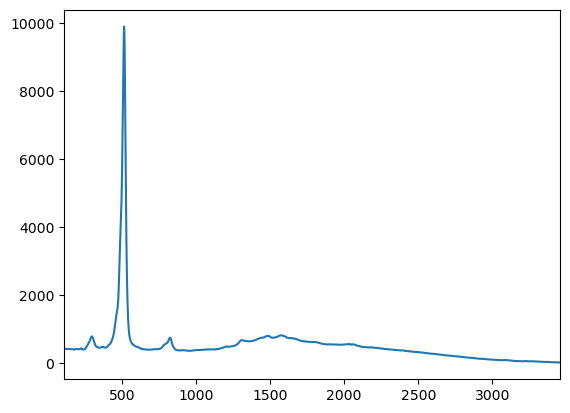

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1)
ax.plot(rr.x, rr.y)
ax.set_xlim([rr.x.min(), rr.x.max()])

In [9]:
for k, v in rr.meta.items():
    print(k,"\n\t",v)

NAMES 
	 Fluorcalcioromeite
RRUFFID 
	 R120140
IDEAL CHEMISTRY 
	 (Ca,Na)_2_Sb^5+^_2_O_6_F
LOCALITY 
	 Starlera mine, Starlera Valley, Ferrera, Hinterrhein district, Grishun, Switzerland
OWNER 
	 RRUFF
SOURCE 
	 Marcelo Andrade
DESCRIPTION 
	 Brownish-yellow octahedra, associated with hematite, calcite and quartz. Type specimen (Atencio et al (2013))
STATUS 
	 The identification of this mineral is confirmed by single-crystal X-ray diffraction and chemical analysis
URL 
	 https://www.rruff.net/odr/rruff_sample/R120140
MEASURED CHEMISTRY 
	 (Ca_1.16_Na_0.56_Fe_0.03_Mn_0.03_)(Sb_1.98_Al_0.01_W_0.01_)_2_O_6_[F_0.62_(OH)_0.35_]
DIFFRACTION SAMPLE DESCRIPTION 
	 Single crystal, powder profile is calculated
CELL PARAMETERS 
	 a: 10.2987 b: 10.2987 c: 10.2987 alpha: 90 beta: 90 gamma: 90 volume: 1092.3 crystal system: cubic
FILETYPE 
	 Raman Processed
RAMAN WAVELENGTH 
	 780
END 
	 
